In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# GETTING DATA FROM KAGGLE LINK

In [5]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("msafi04/predict-mortality-of-icu-patients-physionet")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\ritik\.cache\kagglehub\datasets\msafi04\predict-mortality-of-icu-patients-physionet\versions\1


In [174]:
df = pd.read_csv(path+"/Outcomes-a.txt")


In [175]:
df.describe()

,RecordID,SAPS-I,SOFA,Length_of_stay,Survival,In-hospital_death
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,137605.122000,14.203500,6.402500,13.441750,128.735500,0.138500
std,2923.608886,6.088584,4.201298,12.246371,363.714273,0.345467
min,132539.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,135075.750000,11.000000,3.000000,6.000000,-1.000000,0.000000
50%,137592.500000,15.000000,6.000000,10.000000,-1.000000,0.000000
75%,140100.250000,18.000000,9.000000,17.000000,16.000000,0.000000
max,142673.000000,34.000000,22.000000,154.000000,2600.000000,1.000000


In [143]:
df[['Length_of_stay', 'Survival']].describe()


,Length_of_stay,Survival
count,4000.000000,4000.000000
mean,13.441750,128.735500
std,12.246371,363.714273
min,-1.000000,-1.000000
25%,6.000000,-1.000000
50%,10.000000,-1.000000
75%,17.000000,16.000000
max,154.000000,2600.000000


In [144]:
df['In-hospital_death'].value_counts()

In-hospital_death
0    3446
1     554
Name: count, dtype: int64

## DATA PREPROCESSIG

# RECORDID

In [145]:
df

,RecordID,SAPS-I,SOFA,Length_of_stay,Survival,In-hospital_death
0,132539,6,1,5,-1,0
1,132540,16,8,8,-1,0
2,132541,21,11,19,-1,0
3,132543,7,1,9,575,0
4,132545,17,2,4,918,0
...,...,...,...,...,...,...
3995,142665,19,7,10,336,0
3996,142667,8,2,3,-1,0
3997,142670,8,5,11,-1,0
3998,142671,22,10,8,7,1


In [146]:
df.drop(columns=['RecordID'] , inplace=True)

In [147]:
df

,SAPS-I,SOFA,Length_of_stay,Survival,In-hospital_death
0,6,1,5,-1,0
1,16,8,8,-1,0
2,21,11,19,-1,0
3,7,1,9,575,0
4,17,2,4,918,0
...,...,...,...,...,...
3995,19,7,10,336,0
3996,8,2,3,-1,0
3997,8,5,11,-1,0
3998,22,10,8,7,1


## SURVIVAL

In [148]:
count = (df['Survival'] == -1).sum()
print("Number of rows where survival is -1:", count)

Number of rows where survival is -1: 2526


In [149]:
df['Survival'] = df['Survival'].replace(-1, np.nan)


In [150]:
count = (df['Survival'] == -1).sum()
print("Number of rows where survival is -1:", count)


Number of rows where survival is -1: 0


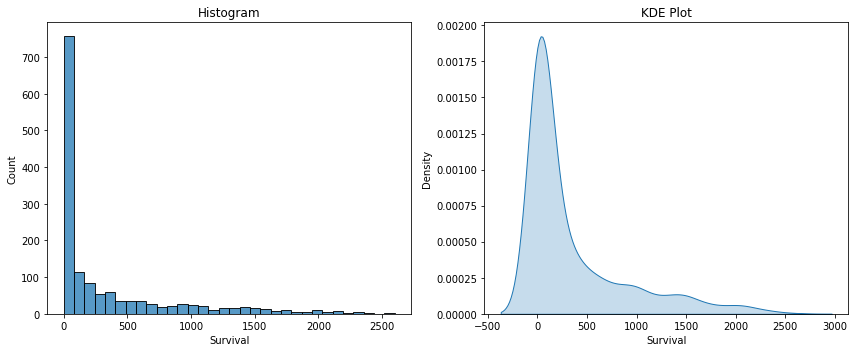

In [151]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 5))  # Overall figure size

# First plot
plt.subplot(1, 2, 1)  
sns.histplot(df['Survival'], kde=False)
plt.title('Histogram')

# Second plot
plt.subplot(1, 2, 2)
sns.kdeplot(df['Survival'], fill=True)
plt.title('KDE Plot')

plt.tight_layout()
plt.show()


we know that "-1" represents that the data is eithr missing or not recorded. Hence we will impute the missing value.

Since the data is right skewed ,  therefore we will median to fill the missing value.

In [152]:
df['Survival'] = df['Survival'].fillna(df['Survival'].median())



In [153]:
print("median value of survival : " , df['Survival'].median())

median value of survival :  70.0


In [154]:
df

,SAPS-I,SOFA,Length_of_stay,Survival,In-hospital_death
0,6,1,5,70.0,0
1,16,8,8,70.0,0
2,21,11,19,70.0,0
3,7,1,9,575.0,0
4,17,2,4,918.0,0
...,...,...,...,...,...
3995,19,7,10,336.0,0
3996,8,2,3,70.0,0
3997,8,5,11,70.0,0
3998,22,10,8,7.0,1


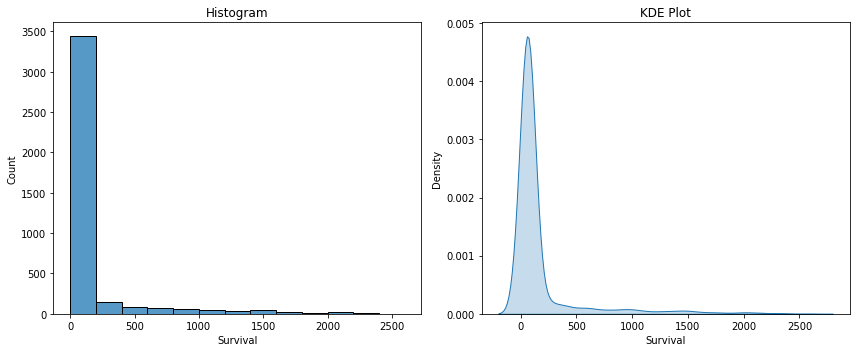

In [155]:
plt.figure(figsize=(12, 5))  # Overall figure size

# First plot
plt.subplot(1, 2, 1)  
sns.histplot(df['Survival'], kde=False)
plt.title('Histogram')

# Second plot
plt.subplot(1, 2, 2)
sns.kdeplot(df['Survival'], fill=True)
plt.title('KDE Plot')

plt.tight_layout()
plt.show()


In [156]:
df

,SAPS-I,SOFA,Length_of_stay,Survival,In-hospital_death
0,6,1,5,70.0,0
1,16,8,8,70.0,0
2,21,11,19,70.0,0
3,7,1,9,575.0,0
4,17,2,4,918.0,0
...,...,...,...,...,...
3995,19,7,10,336.0,0
3996,8,2,3,70.0,0
3997,8,5,11,70.0,0
3998,22,10,8,7.0,1


## SAPS-I

In [157]:
df[['SAPS-I']].describe()

,SAPS-I
count,4000.000000
mean,14.203500
std,6.088584
min,-1.000000
25%,11.000000
50%,15.000000
75%,18.000000
max,34.000000


In [158]:
# Replacing the missing value with nan
df['SAPS-I'] = df['SAPS-I'].replace(-1, np.nan)

In [159]:
df[['SAPS-I']].describe()

,SAPS-I
count,3810.000000
mean,14.961680
std,5.178322
min,1.000000
25%,11.000000
50%,15.000000
75%,19.000000
max,34.000000


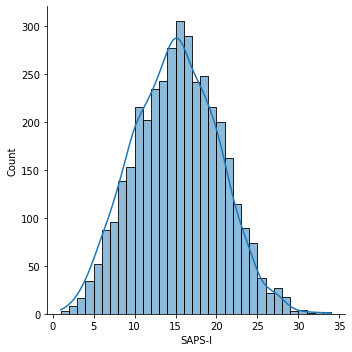

In [160]:
#checking the distribution
sns.displot(df['SAPS-I'] , kde = True)
plt.show()

In [161]:
print("mean of SAPS-I" , df['SAPS-I'].mean())

mean of SAPS-I 14.961679790026247


In [162]:
## Filling the missing value with mean
df['SAPS-I'] = df['SAPS-I'].fillna(df['SAPS-I'].mean())
df[['SAPS-I']].describe()


,SAPS-I
count,4000.000000
mean,14.961680
std,5.053809
min,1.000000
25%,11.000000
50%,15.000000
75%,18.000000
max,34.000000


## SOFA

In [163]:
df[['SOFA']].describe()

,SOFA
count,4000.000000
mean,6.402500
std,4.201298
min,-1.000000
25%,3.000000
50%,6.000000
75%,9.000000
max,22.000000


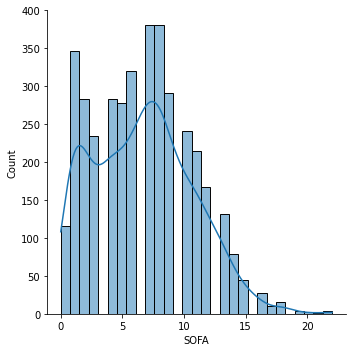

In [164]:
# Replacing the missing value with nan
df['SOFA'] = df['SOFA'].replace(-1, np.nan)
#checking the distribution
sns.displot(df['SOFA'] , kde = True)
plt.show()

In [165]:
print("mean : " , df['SOFA'].mean())

mean :  6.678941908713693


In [166]:
df['SOFA'] = df['SOFA'].fillna(df['SOFA'].mean())
df[['SOFA']].describe()

,SOFA
count,4000.000000
mean,6.678942
std,3.950194
min,0.000000
25%,4.000000
50%,6.678942
75%,9.000000
max,22.000000


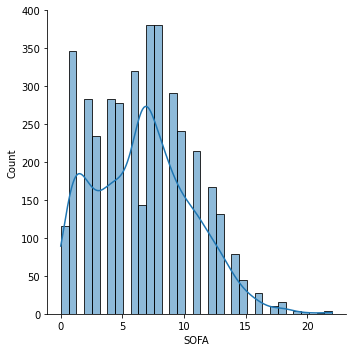

In [167]:
sns.displot(df['SOFA'] , kde = True)
plt.show()

In [168]:
df

,SAPS-I,SOFA,Length_of_stay,Survival,In-hospital_death
0,6.0,1.0,5,70.0,0
1,16.0,8.0,8,70.0,0
2,21.0,11.0,19,70.0,0
3,7.0,1.0,9,575.0,0
4,17.0,2.0,4,918.0,0
...,...,...,...,...,...
3995,19.0,7.0,10,336.0,0
3996,8.0,2.0,3,70.0,0
3997,8.0,5.0,11,70.0,0
3998,22.0,10.0,8,7.0,1


## Length_of_stay

In [169]:
df[['Length_of_stay']].describe()

,Length_of_stay
count,4000.000000
mean,13.441750
std,12.246371
min,-1.000000
25%,6.000000
50%,10.000000
75%,17.000000
max,154.000000


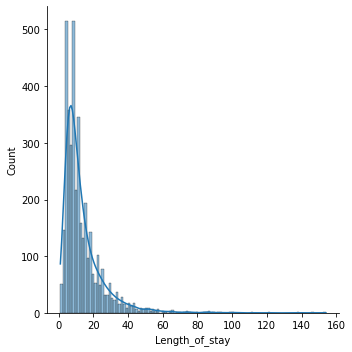

In [170]:
df['Length_of_stay'] = df['Length_of_stay'].replace(-1 , np.nan)
sns.displot(df['Length_of_stay'], kde = True)
plt.show()

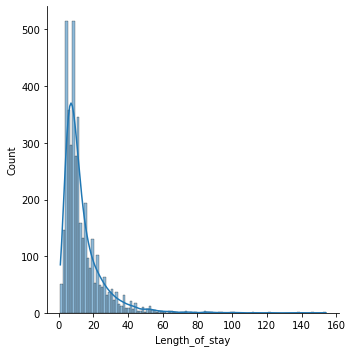

In [171]:
## Using median to fill the missing value
df['Length_of_stay'] = df['Length_of_stay'].fillna(df['Length_of_stay'].median())
sns.displot(df['Length_of_stay'], kde = True)
plt.show()


In [173]:
print("median : " , df['Length_of_stay'].median())

median :  10.0


In [172]:
df

,SAPS-I,SOFA,Length_of_stay,Survival,In-hospital_death
0,6.0,1.0,5.0,70.0,0
1,16.0,8.0,8.0,70.0,0
2,21.0,11.0,19.0,70.0,0
3,7.0,1.0,9.0,575.0,0
4,17.0,2.0,4.0,918.0,0
...,...,...,...,...,...
3995,19.0,7.0,10.0,336.0,0
3996,8.0,2.0,3.0,70.0,0
3997,8.0,5.0,11.0,70.0,0
3998,22.0,10.0,8.0,7.0,1


## EDA

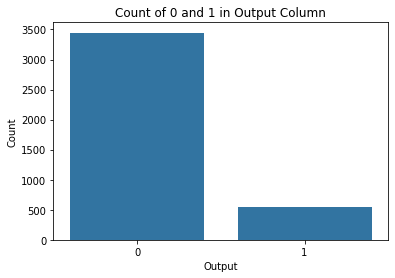

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt

# Countplot for values 0 and 1 in 'output' column
sns.countplot(x='In-hospital_death', data=df)

plt.title('Count of 0 and 1 in Output Column')
plt.xlabel('Output')
plt.ylabel('Count')
plt.show()


This is an unbalanced dataset as the number of pateints who die is significantly less than the who who survives.|

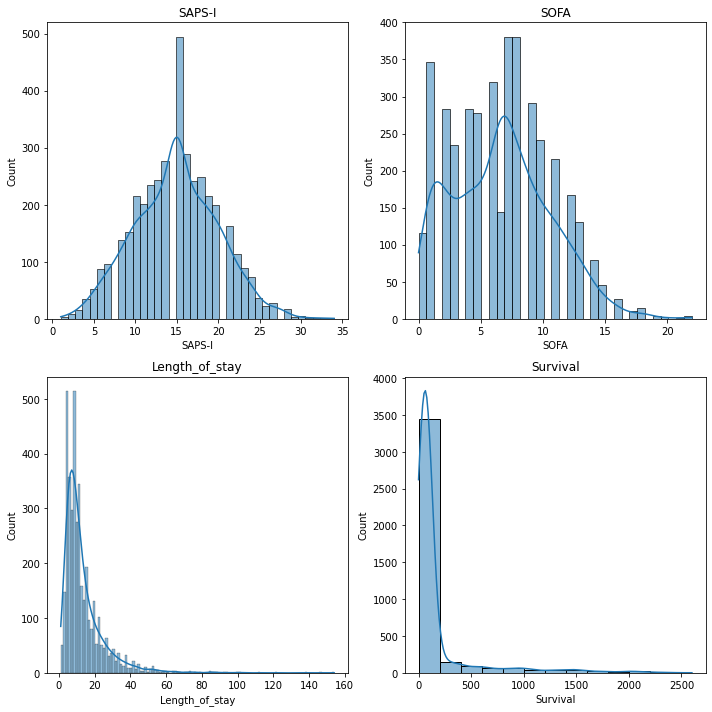

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))

# Subplot 1
plt.subplot(2, 2, 1)
sns.histplot(df['SAPS-I'], kde=True)
plt.title('SAPS-I')

# Subplot 2
plt.subplot(2, 2, 2)
sns.histplot(df['SOFA'], kde=True)
plt.title('SOFA')

# Subplot 3
plt.subplot(2, 2, 3)
sns.histplot(df['Length_of_stay'], kde=True)
plt.title('Length_of_stay')

# Subplot 4
plt.subplot(2, 2, 4)
sns.histplot(df['Survival'], kde=True)
plt.title('Survival')

plt.tight_layout()  # To prevent overlapping of titles and plots
plt.show()


In [87]:

#df['Length_of_stay'] = np.log1p(df['Length_of_stay'])
#df['Survival'] = np.log1p(df['Survival'])



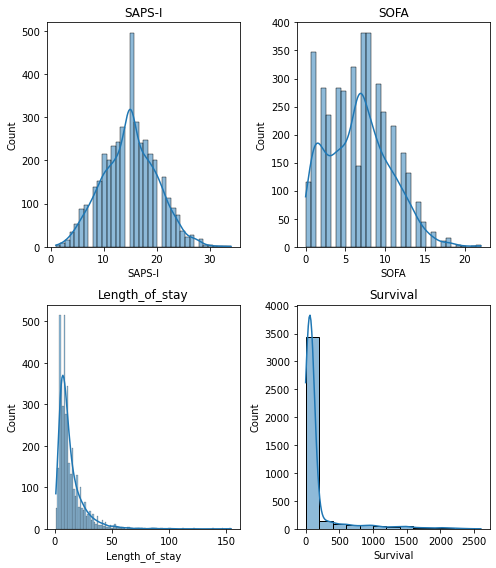

In [88]:
plt.figure(figsize=(7,8))
# Subplot 1
plt.subplot(2, 2, 1)
sns.histplot(df['SAPS-I'], kde=True)
plt.title('SAPS-I')

# Subplot 2
plt.subplot(2, 2, 2)
sns.histplot(df['SOFA'], kde=True)
plt.title('SOFA')

# Subplot 3
plt.subplot(2, 2, 3)
sns.histplot(df['Length_of_stay'], kde=True)
plt.title('Length_of_stay')

# Subplot 4
plt.subplot(2, 2, 4)
sns.histplot(df['Survival'], kde=True)
plt.title('Survival')

plt.tight_layout()  # To prevent overlapping of titles and plots
plt.show()

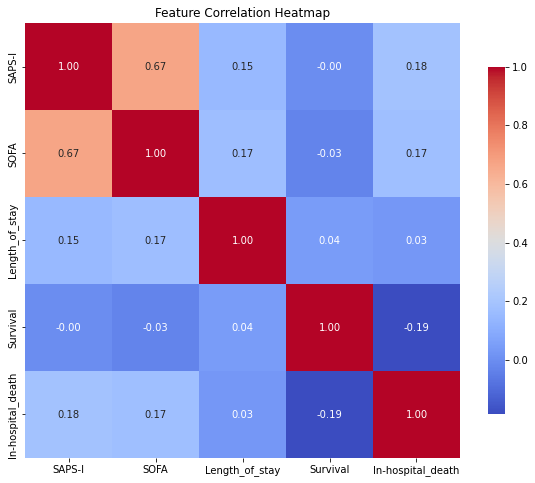

In [89]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar_kws={"shrink": .8})
plt.title("Feature Correlation Heatmap")
plt.show()


All the columns are pretty much independent of each other

SPLITING 

In [90]:
X = df.iloc[:, :-1]
y = df['In-hospital_death']
X

,SAPS-I,SOFA,Length_of_stay,Survival
0,6.0,1.0,5.0,70.0
1,16.0,8.0,8.0,70.0
2,21.0,11.0,19.0,70.0
3,7.0,1.0,9.0,575.0
4,17.0,2.0,4.0,918.0
...,...,...,...,...
3995,19.0,7.0,10.0,336.0
3996,8.0,2.0,3.0,70.0
3997,8.0,5.0,11.0,70.0
3998,22.0,10.0,8.0,7.0


In [91]:
y

0       0
1       0
2       0
3       0
4       0
       ..
3995    0
3996    0
3997    0
3998    1
3999    0
Name: In-hospital_death, Length: 4000, dtype: int64

In [92]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.3 , random_state=42)
print("X_train : " , X_train.shape)
print("X_test" , X_test.shape)
print("y_train : " , y_train.shape)
print("y_test : " , y_test.shape)


X_train :  (2800, 4)
X_test (1200, 4)
y_train :  (2800,)
y_test :  (1200,)


APPLYING STANDARDISATION

In [93]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)  # Fit to training data and transform it
X_test = sc.transform(X_test)        # Use the same transformation on test data


In [94]:
X_train

array([[-0.18578041, -1.18265478, -0.45120914,  0.56679272],
       [ 2.19494781,  1.60682784, -0.61251986, -0.30012404],
       [-1.57453854, -1.43624411,  0.03272303, -0.30012404],
       ...,
       [ 0.0126136 ,  0.84605985, -0.61251986, -0.30012404],
       [-0.18578041, -0.16829746,  0.03272303, -0.30012404],
       [ 0.80618968,  0.59247052, -0.61251986, -0.30012404]],
      shape=(2800, 4))

In [95]:
sc.mean_

array([ 14.93642145,   6.66366146,  13.59428571, 176.2825    ])

In [96]:
sc.scale_

array([  5.04047454,   3.9433836 ,  12.39843176, 354.12857509])

In [97]:
df.describe()

,SAPS-I,SOFA,Length_of_stay,Survival,In-hospital_death
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,14.961680,6.678942,13.606750,173.572000,0.138500
std,5.053809,3.950194,12.124143,349.034046,0.345467
min,1.000000,0.000000,1.000000,0.000000,0.000000
25%,11.000000,4.000000,6.000000,70.000000,0.000000
50%,15.000000,6.678942,10.000000,70.000000,0.000000
75%,18.000000,9.000000,17.000000,70.000000,0.000000
max,34.000000,22.000000,154.000000,2600.000000,1.000000


MODEL TRAINING

In [104]:
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.naive_bayes import GaussianNB


# Define models
models = {
    "Logistic Regression": LogisticRegression(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Bagging": BaggingClassifier(),
    "Naive Bayes": GaussianNB(),

}

# Store results
results = []

# Training and evaluation loop
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    report = classification_report(y_test, y_pred, output_dict=True)
    
    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision_1": report['1']['precision'],
        "Recall_1": report['1']['recall'],
        "F1_1": report['1']['f1-score']
    })

# Create DataFrame
results_df = pd.DataFrame(results)

# Sort by Recall_1, F1_1, then Precision_1 (descending)
results_df_sorted = results_df.sort_values(by=['Recall_1', 'F1_1', 'Precision_1'], ascending=False).reset_index(drop=True)

# Display top models
print("\n📊 Ranked Models based on Class '1' (dies) performance:\n")
print(results_df_sorted)



📊 Ranked Models based on Class '1' (dies) performance:

                    Model  Accuracy  Precision_1  Recall_1      F1_1
0                 Bagging  0.990833     0.948864  0.988166  0.968116
1                AdaBoost  0.980000     0.883598  0.988166  0.932961
2       Gradient Boosting  0.990833     0.954023  0.982249  0.967930
3           Random Forest  0.987500     0.932584  0.982249  0.956772
4           Decision Tree  0.987500     0.947674  0.964497  0.956012
5             Naive Bayes  0.970000     0.851852  0.952663  0.899441
6     Logistic Regression  0.977500     0.943750  0.893491  0.917933
7  Support Vector Machine  0.960000     0.866667  0.846154  0.856287
8     K-Nearest Neighbors  0.885833     0.766667  0.272189  0.401747


WE ARE GOING TO GO WITH BAGGING!!

In [105]:
from sklearn.metrics import accuracy_score
model = BaggingClassifier()
model.fit(X_train , y_train)
# Predictions
train_preds = model.predict(X_train)
test_preds = model.predict(X_test)

# Accuracy
print("Train Accuracy:", accuracy_score(y_train, train_preds))
print("Test Accuracy :", accuracy_score(y_test, test_preds))


Train Accuracy: 0.9996428571428572
Test Accuracy : 0.99


## Cross Validation

In [106]:
from sklearn.model_selection import cross_val_score

# 5-fold cross-validation (commonly used)
scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')

# Show scores from each fold
print("Cross-Validation Scores:", scores)

# Mean performance across all folds
print("Mean Accuracy:", scores.mean())


Cross-Validation Scores: [0.985   0.99625 0.995   0.99125 0.99375]
Mean Accuracy: 0.99225


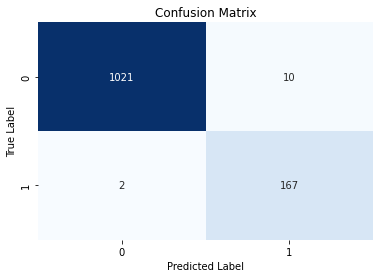

In [107]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


y_pred = model.predict(X_test)

# Step 2: Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Step 3: Plot it using seaborn heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


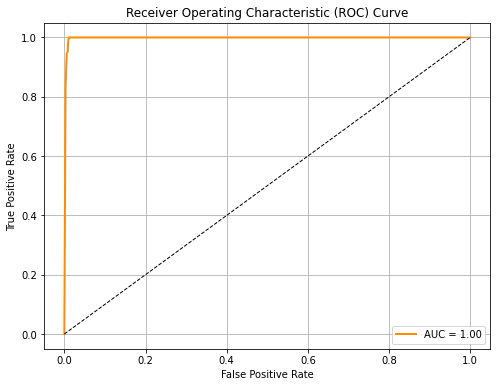

In [108]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Get predicted probabilities for the positive class (1)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Calculate FPR (False Positive Rate), TPR (True Positive Rate), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate AUC
auc = roc_auc_score(y_test, y_pred_proba)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}', color='darkorange', lw=2)
plt.plot([0, 1], [0, 1], 'k--', lw=1)  # Random chance line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


### HYPERPARAMETER TUNING

In [109]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Base model
base_estimator = DecisionTreeClassifier(random_state=42)

# Bagging Classifier
bagging = BaggingClassifier(
    estimator=base_estimator,
    random_state=42,
    oob_score=True
)

# Define the grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_samples': [0.5, 0.7, 0.9],
    'max_features': [0.5, 0.7, 0.9],
    'estimator__max_depth': [3, 5, 7],
    'estimator__min_samples_split': [2, 5, 10]
}

# Grid Search
grid = GridSearchCV(
    estimator=bagging,
    param_grid=param_grid,
    scoring='recall',  # Because you care about recall more!
    cv=5,
    n_jobs=-1,
    verbose=2
)

grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best Recall Score:", grid.best_score_)


Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best Parameters: {'estimator__max_depth': 5, 'estimator__min_samples_split': 2, 'max_features': 0.9, 'max_samples': 0.9, 'n_estimators': 50}
Best Recall Score: 0.9558441558441558


In [110]:
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)


Classification Report:
              precision    recall  f1-score   support

Survived (0)       1.00      0.99      0.99      1031
    Died (1)       0.93      0.98      0.95       169

    accuracy                           0.99      1200
   macro avg       0.96      0.98      0.97      1200
weighted avg       0.99      0.99      0.99      1200



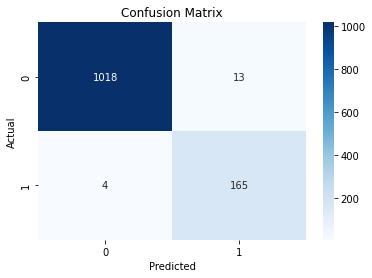

ROC AUC Score: 0.9976


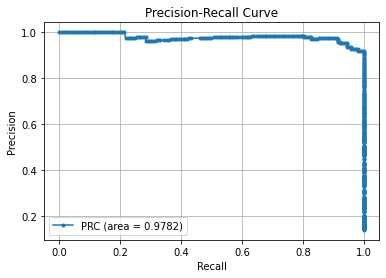

In [111]:
# Step 1: Get the best tuned model
best_model = grid.best_estimator_

# Step 2: Predict on the test set
y_pred = best_model.predict(X_test)

# Step 3: Evaluate the performance
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, precision_recall_curve, auc

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=["Survived (0)", "Died (1)"]))

# Step 4: Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Step 5: Calculate ROC AUC Score
y_proba = best_model.predict_proba(X_test)[:,1]
roc_auc = roc_auc_score(y_test, y_proba)
print(f"ROC AUC Score: {roc_auc:.4f}")

# Step 6: Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test, y_proba)
prc_auc = auc(recall, precision)

plt.figure(figsize=(6,4))
plt.plot(recall, precision, marker='.', label=f'PRC (area = {prc_auc:.4f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid()
plt.show()


## PICKLING THE MODEL

In [113]:
import pickle

# Save the best model to a file
with open('model.pkl', 'wb') as f:
    pickle.dump(best_model, f)

print("Model saved successfully as 'model.pkl'")

Model saved successfully as 'model.pkl'
